In [1]:
import feather
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

In [2]:
%%time
df = feather.read_dataframe('/Volumes/transcend/大檔案/Taxi/NYT/nyc_taxi_data_raw_clean.feather')

CPU times: user 8.65 s, sys: 7.95 s, total: 16.6 s
Wall time: 55.8 s


In [3]:
df.head(2)

,fare_amount,passenger_count,distance,year,month,weekday,hour
0,4.5,1,1.029579,2009,6,Monday,17
1,16.9,1,8.443307,2010,1,Tuesday,16


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54054801 entries, 0 to 54054800
Data columns (total 7 columns):
fare_amount        float32
passenger_count    uint8
distance           float64
year               int64
month              int64
weekday            object
hour               int64
dtypes: float32(1), float64(1), int64(3), object(1), uint8(1)
memory usage: 2.3+ GB


## EDA

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"/System/Library/Fonts/STHeiti Light.ttc")

### Feature 1 - fare_amount

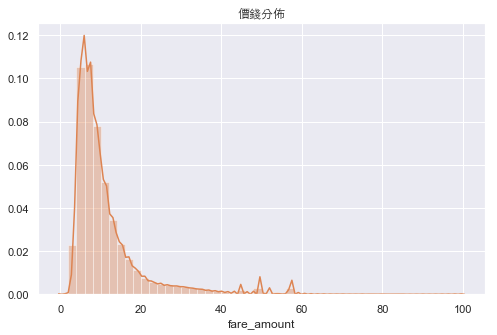

CPU times: user 15.8 s, sys: 6.3 s, total: 22.1 s
Wall time: 24.9 s


In [10]:
%%time
df2 = df[df['fare_amount']<100]
sns.distplot(df2['fare_amount'])
plt.title("價錢分佈",fontproperties=font,size=12)
plt.gcf().set_size_inches(8,5)
plt.show()

### Feature 2 - passenger_count

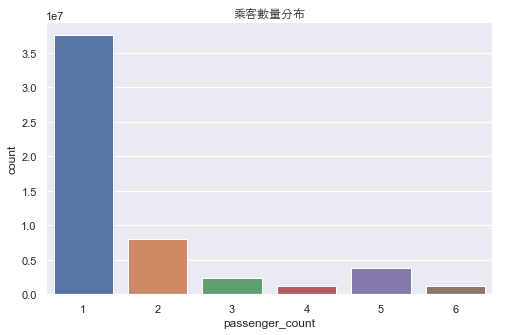

CPU times: user 2.98 s, sys: 2.51 s, total: 5.48 s
Wall time: 5.81 s


In [7]:
%%time
sns.countplot(data=df,x='passenger_count')
plt.title("乘客數量分佈",fontproperties=font,size=12)
plt.gcf().set_size_inches(8,5)
plt.show()

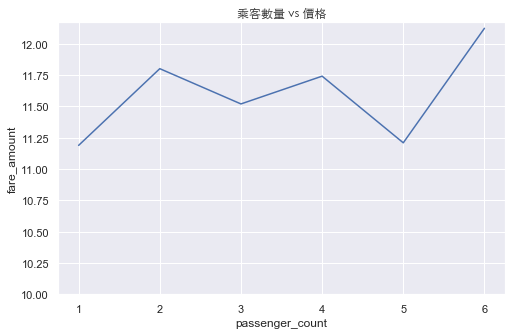

CPU times: user 389 ms, sys: 43 ms, total: 432 ms
Wall time: 274 ms


In [86]:
%%time
df_f2 = df.groupby('passenger_count').mean()
df_f2.reset_index(inplace=True)
sns.lineplot(x=df_f2['passenger_count'], y=df_f2['fare_amount'])
plt.title("乘客數量 vs 價格",fontproperties=font,size=12)
plt.gcf().set_size_inches(8,5)
plt.ylim(10)
plt.show()

### Feature 3 - distance

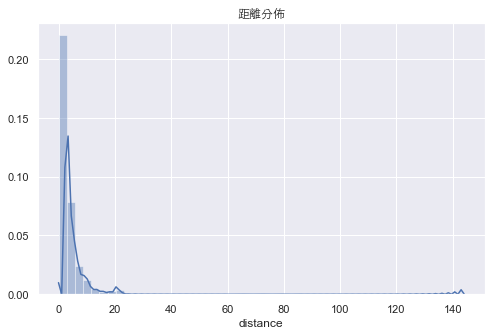

CPU times: user 28.6 s, sys: 3.83 s, total: 32.4 s
Wall time: 33.4 s


In [42]:
%%time
sns.distplot(df['distance'])
plt.title("距離分佈",fontproperties=font,size=12)
plt.gcf().set_size_inches(8,5)
plt.show()

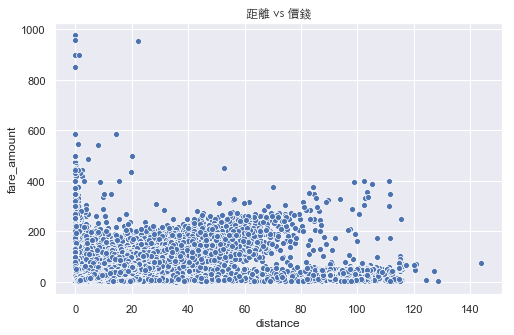

CPU times: user 10min 2s, sys: 32.8 s, total: 10min 35s
Wall time: 11min 5s


In [91]:
%%time
sns.scatterplot(data=df, x='distance', y='fare_amount')
plt.gcf().set_size_inches(8,5)
plt.title("距離 vs 價錢",fontproperties=font,size=12)
plt.show()

### Feature 4 - year

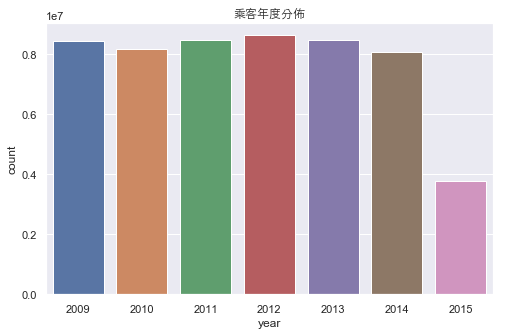

CPU times: user 3.14 s, sys: 2.61 s, total: 5.75 s
Wall time: 6.31 s


In [48]:
%%time
sns.countplot(data=df,x='year')
plt.title("乘客年度分佈",fontproperties=font,size=12)
plt.gcf().set_size_inches(8,5)
plt.show()

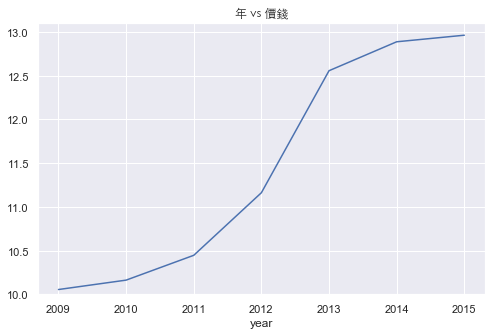

CPU times: user 366 ms, sys: 38.3 ms, total: 404 ms
Wall time: 261 ms


In [87]:
%%time
# 車資隨時間上漲
df_f4 = df.groupby(['year'])['fare_amount'].mean()
sns.lineplot(x=df_f4.index, y=df_f4.values)
plt.title("年 vs 價錢", fontproperties=font,size=12)
plt.gcf().set_size_inches(8,5)
plt.ylim(10)
plt.show()

### Feature 5 - month

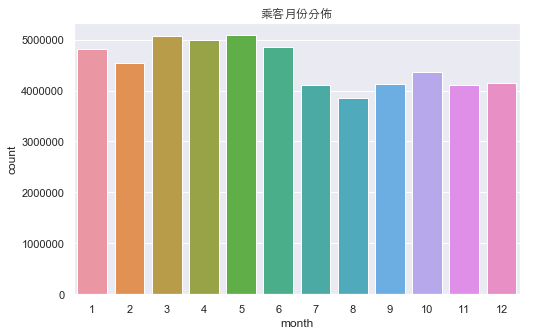

CPU times: user 3.6 s, sys: 2.44 s, total: 6.04 s
Wall time: 6.74 s


In [49]:
%%time
sns.countplot(data=df,x='month')
plt.title("乘客月份分佈",fontproperties=font,size=12)
plt.gcf().set_size_inches(8,5)
plt.show()

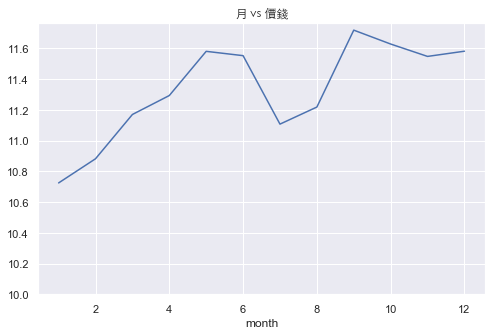

CPU times: user 366 ms, sys: 37.4 ms, total: 404 ms
Wall time: 249 ms


In [88]:
%%time
# 月份價格頗詭異
df_f5 = df.groupby(['month'])['fare_amount'].mean()
sns.lineplot(x=df_f5.index, y=df_f5.values)
plt.title("月 vs 價錢", fontproperties=font,size=12)
plt.gcf().set_size_inches(8,5)
plt.ylim(10)
plt.show()

### Feature 6 - weekday

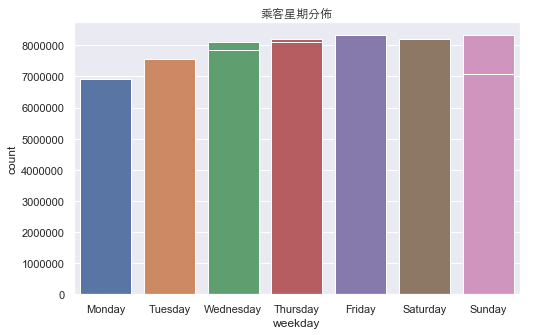

CPU times: user 45.4 s, sys: 52.9 s, total: 1min 38s
Wall time: 1min 51s


In [63]:
%%time
week_pass = []
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for i in weekday:
    week_pass.append([i,len(df[df['weekday']==i])])
df_f6 = pd.DataFrame(week_pass, columns=['weekday','count'])
sns.barplot(x='weekday', y='count', data=df_f6)
plt.title("乘客星期分佈",fontproperties=font,size=12)
plt.gcf().set_size_inches(8,5)
plt.show()

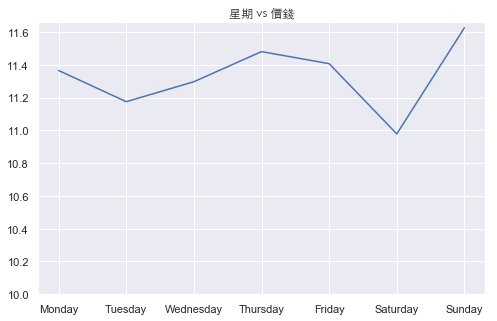

CPU times: user 365 ms, sys: 51.5 ms, total: 416 ms
Wall time: 262 ms


In [14]:
%%time
week_fare = []
for i in weekday:
    week_fare.append([i,df[df['weekday']==i]['fare_amount'].sum()/len(df[df['weekday']==i]['fare_amount'])])
df_f62 = pd.DataFrame(week_fare, columns=['weekday','fare_amount'])
plt.plot(df_f62['weekday'],df_f62['fare_amount'])
plt.title("星期 vs 價錢", fontproperties=font,size=12)
plt.gcf().set_size_inches(8,5)
plt.ylim(10)
plt.show()

### Feature 7 - hour

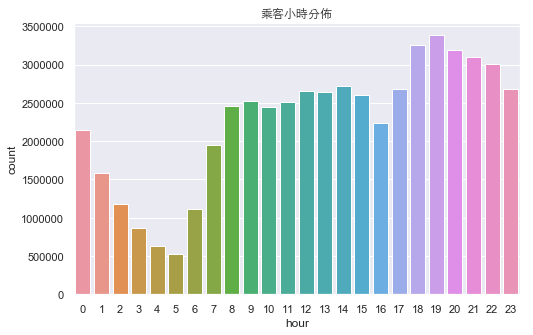

CPU times: user 4.4 s, sys: 3.78 s, total: 8.18 s
Wall time: 9.74 s


In [55]:
%%time
sns.countplot(data=df,x='hour')
plt.title("乘客小時分佈",fontproperties=font,size=12)
plt.gcf().set_size_inches(8,5)
plt.show()

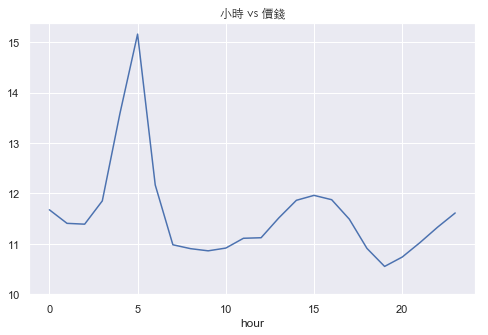

CPU times: user 1.63 s, sys: 1.39 s, total: 3.03 s
Wall time: 3.09 s


In [90]:
%%time
# 凌晨五點最貴？
df_f7 = df.groupby(['hour'])['fare_amount'].mean()
sns.lineplot(x=df_f7.index, y=df_f7.values)
plt.title("小時 vs 價錢", fontproperties=font,size=12)
plt.gcf().set_size_inches(8,5)
plt.ylim(10)
plt.show()